Problem Statement :
On the basis of Age, Gender , salary we will classify the customers will purchase the commodity or not.

About Dataset:


It is a dataset which describes customer details.On the basis of which predictions are made whether the customer purchases commodity or not.


Attribute Information:

Sales data

Input Variables-

1-  gender -- (Male,Female; categorical )

2- age -- (numeric)

3- estimated salary--(numeric)

We will create a model with the help of KNN Algorithm and we will see what kind of classification we are able to do from it.



Output Variable-(purchase)

4- Purchased--will the customer purchase or not?(binary:0= No, 1= YES)


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
# we will drop user id column as its not essential here
df=data.drop(['User ID'],axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Using one Hot Encoding we will convert categorical column into numerical

In [38]:
df['Gender']=df['Gender'].apply({'Male':1,'Female':2}.get)

In [39]:
# dividing the data into independent and dependent columns/variables
x=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']

In [40]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


In [41]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.85)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)        # here we are choosing k=5 as n_neighbor=5

In [43]:
# training the model
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
# making predictions
predictions= knn.predict(x_test)

In [45]:
print(predictions)
# 0 means customer didn't purchase and 1= customer purchased

[1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0
 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1]


Predictions for new customer data/new data

In [47]:
new_data= [{'Gender':1,'Age':30,'EstimatedSalary':12000},{'Gender':2,'Age':25,'EstimatedSalary':30000}]
index=[2]

In [49]:
new_data

[{'Gender': 1, 'Age': 30, 'EstimatedSalary': 12000},
 {'Gender': 2, 'Age': 25, 'EstimatedSalary': 30000}]

In [53]:
my_data=pd.DataFrame(new_data)

In [54]:
my_data

,Gender,Age,EstimatedSalary
0,1,30,12000
1,2,25,30000


from matplotlib import pyplot as plt
my_data['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
my_data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
my_data['EstimatedSalary'].plot(kind='hist', bins=20, title='EstimatedSalary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
my_data.plot(kind='scatter', x='Gender', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
my_data.plot(kind='scatter', x='Age', y='EstimatedSalary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Gender']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = my_data.sort_values('Gender', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Gender')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Gender']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Gender'}, axis=1)
              .sort_values('Gender', ascending=True))
  xs = counted['Gender']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = my_data.sort_values('Gender', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Gender')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EstimatedSalary']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = my_data.sort_values('EstimatedSalary', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EstimatedSalary')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['EstimatedSalary']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'EstimatedSalary'}, axis=1)
              .sort_values('EstimatedSalary', ascending=True))
  xs = counted['EstimatedSalary']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = my_data.sort_values('EstimatedSalary', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EstimatedSalary')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
my_data['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
my_data['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
my_data['EstimatedSalary'].plot(kind='line', figsize=(8, 4), title='EstimatedSalary')
plt.gca().spines[['top', 'right']].set_visible(False)

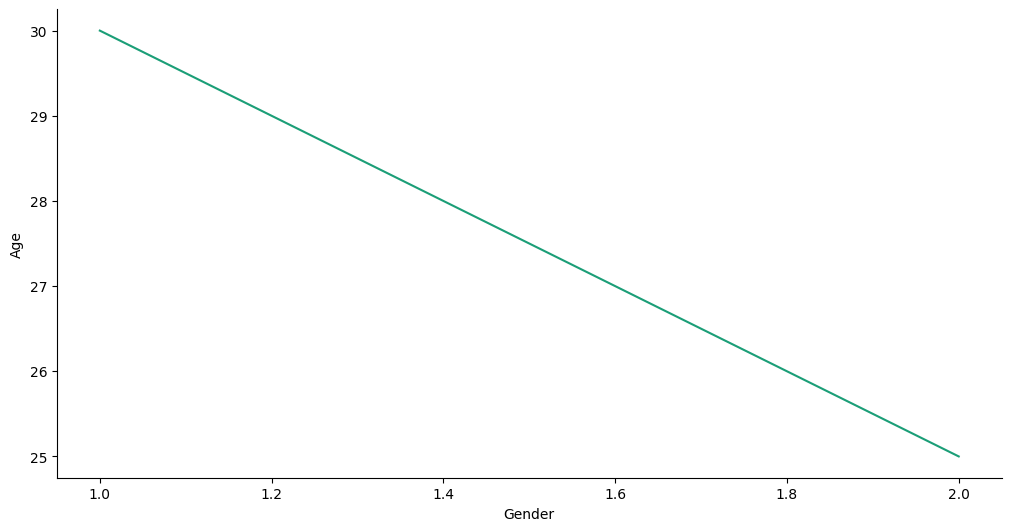

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Gender']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = my_data.sort_values('Gender', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Gender')
_ = plt.ylabel('Age')

Data Distributions

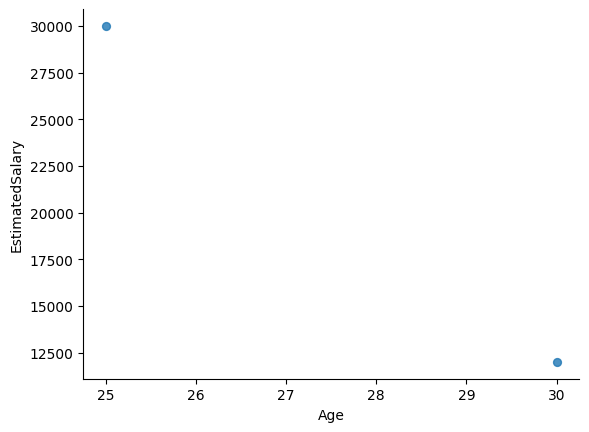

In [65]:
from matplotlib import pyplot as plt
my_data.plot(kind='scatter', x='Age', y='EstimatedSalary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

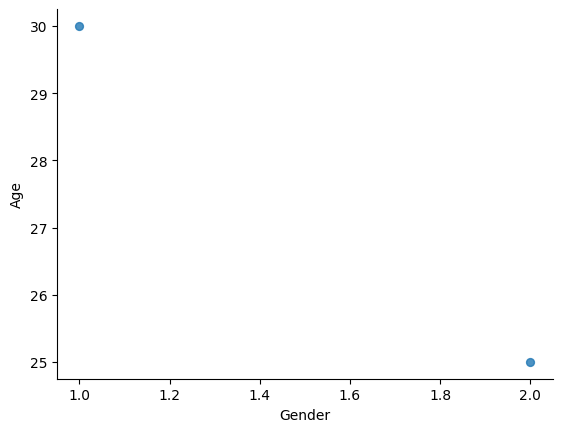

In [64]:
from matplotlib import pyplot as plt
my_data.plot(kind='scatter', x='Gender', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

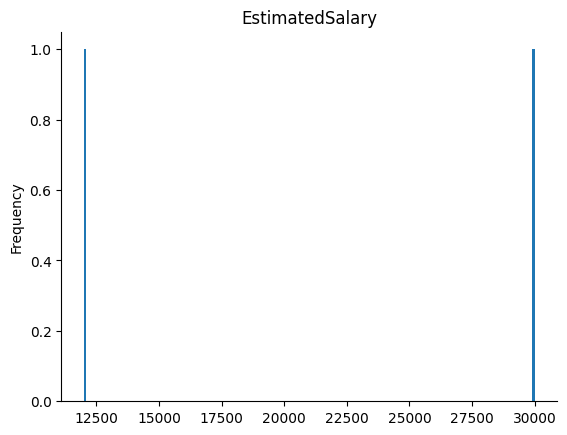

In [67]:
from matplotlib import pyplot as plt
my_data['EstimatedSalary'].plot(kind='hist', bins=20, title='EstimatedSalary')
plt.gca().spines[['top', 'right',]].set_visible(False)

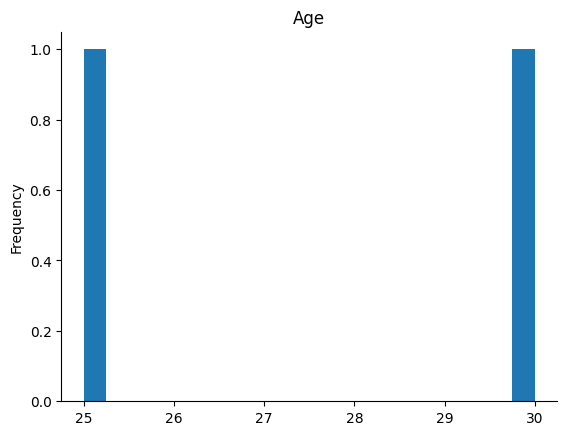

In [62]:
# @title Age

from matplotlib import pyplot as plt
my_data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

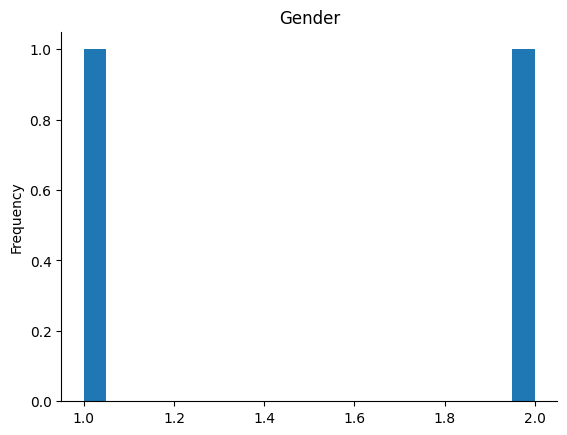

In [60]:
# @title Gender

from matplotlib import pyplot as plt
my_data['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [55]:
new_predictions= knn.predict(my_data)

In [59]:
print("The new customer 1 and 2 will respectively",new_predictions,"the product")

The new customer 1 and 2 will respectively [0 1] the product


 Results---
 Customer 1 will not purchase the product while customer 2 will purchase the product.